In [1]:
import compnal
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [2]:
degree = 3
J = -1.0
N_list = [9, 12, 15, 18, 21, 24]
T_list = np.arange(2.2, 2.31, 0.01)

In [3]:
bind = []
mag_mag = []
mag_mag_mag_mag = []
for N in N_list:
    temp_bind = []
    temp_mag_mag = []
    temp_mag_mag_mag_mag = []
    for t in tqdm(T_list):
        lattice = compnal.lattice.Square(
            x_size=N,
            y_size=N,
            boundary_condition=compnal.lattice.BoundaryCondition.PBC
        )
        model = compnal.model.PolynomialIsing(
            lattice=lattice, interaction={degree: J}
        )
        solver = compnal.solver.ClassicalMonteCarlo(
            model=model, 
            updater=compnal.solver.Updater.METROPOLIS
        )
        solver.num_sweeps = 20000
        solver.num_samples = 20000
        solver.num_threads = 10
        solver.temperature = t
        solver.run()
        mm = solver.calculate_moment(2)
        mmmm = solver.calculate_moment(4)
        #print(mmmm, mm, 1-mmmm/(3*mm*mm))
        temp_mag_mag.append(mm)
        temp_mag_mag_mag_mag.append(mmmm)
        temp_bind.append(1-mmmm/(3*mm*mm))
    bind.append(temp_bind)
    mag_mag.append(temp_mag_mag)
    mag_mag_mag_mag.append(temp_mag_mag_mag_mag)


 91%|█████████ | 10/11 [2:09:28<13:27, 807.74s/it] 

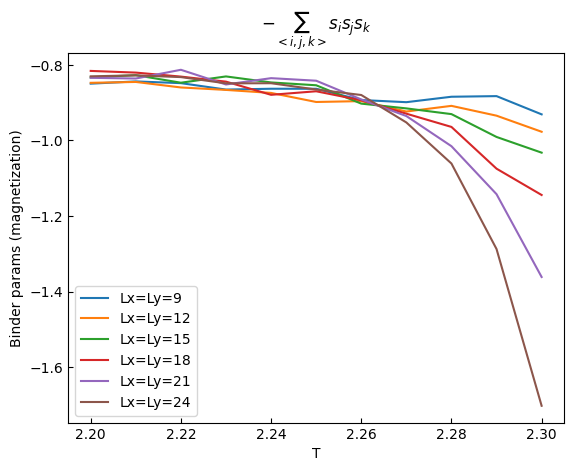

In [ ]:
plt.plot(T_list, bind[0], label="Lx=Ly=9")
plt.plot(T_list, bind[1], label="Lx=Ly=12")
plt.plot(T_list, bind[2], label="Lx=Ly=15")
plt.plot(T_list, bind[3], label="Lx=Ly=18")
plt.plot(T_list, bind[4], label="Lx=Ly=21")
plt.plot(T_list, bind[5], label="Lx=Ly=24")
#plt.plot(T_list, bind[6], label="Lx=Ly=27")
#plt.plot(T_list, bind[7], label="Lx=Ly=30")
plt.xlabel("T")
plt.ylabel("Binder params (magnetization)")
plt.title("$-\sum_{<i,j,k>}s_is_js_k$")
plt.legend()

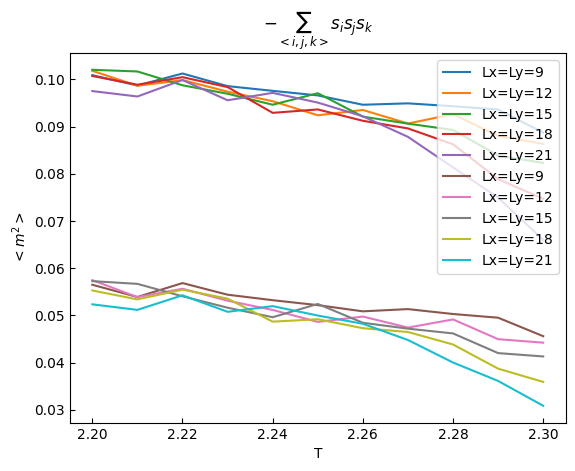

In [ ]:
plt.plot(T_list, mag_mag[0], label="Lx=Ly=9")
plt.plot(T_list, mag_mag[1], label="Lx=Ly=12")
plt.plot(T_list, mag_mag[2], label="Lx=Ly=15")
plt.plot(T_list, mag_mag[3], label="Lx=Ly=18")
plt.plot(T_list, mag_mag[4], label="Lx=Ly=21")
#plt.plot(T_list, mag[3])

plt.xlabel("T")
plt.ylabel("$<m^2>$")
plt.title("$-\sum_{<i,j,k>}s_is_js_k$")
plt.legend()

plt.plot(T_list, mag_mag_mag_mag[0], label="Lx=Ly=9")
plt.plot(T_list, mag_mag_mag_mag[1], label="Lx=Ly=12")
plt.plot(T_list, mag_mag_mag_mag[2], label="Lx=Ly=15")
plt.plot(T_list, mag_mag_mag_mag[3], label="Lx=Ly=18")
plt.plot(T_list, mag_mag_mag_mag[4], label="Lx=Ly=21")
#plt.plot(T_list, mag[3])

plt.xlabel("T")
plt.ylabel("$<m^2>$")
plt.title("$-\sum_{<i,j,k>}s_is_js_k$")
plt.legend()

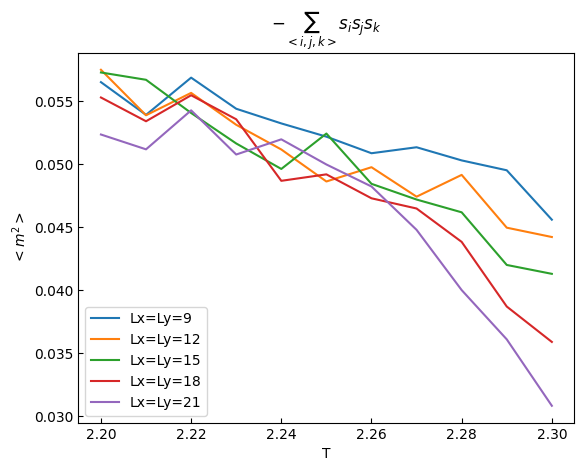

In [ ]:
plt.plot(T_list, mag_mag_mag_mag[0], label="Lx=Ly=9")
plt.plot(T_list, mag_mag_mag_mag[1], label="Lx=Ly=12")
plt.plot(T_list, mag_mag_mag_mag[2], label="Lx=Ly=15")
plt.plot(T_list, mag_mag_mag_mag[3], label="Lx=Ly=18")
plt.plot(T_list, mag_mag_mag_mag[4], label="Lx=Ly=21")
#plt.plot(T_list, mag[3])

plt.xlabel("T")
plt.ylabel("$<m^2>$")
plt.title("$-\sum_{<i,j,k>}s_is_js_k$")
plt.legend()

In [ ]:
bind[4]

[-0.8340788205085556,
 -0.8359525290222307,
 -0.8128196719043785,
 -0.8517603961290965,
 -0.8349917797712278,
 -0.8417553437931145,
 -0.8912843445799932,
 -0.9352651242366343,
 -1.0151153124047045,
 -1.142132471192237,
 -1.3613793973029877]